# Heart Disease
## Regressão Logística
Rodrigo Schulz

Vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [50]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [51]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE).

In [52]:
tab = pd.crosstab(df['flag_doente'], df['sex'], margins= True)
tab['probabilidade'] = tab[1]/tab['All']
tab['chance'] = tab[1]/tab[0]
tab

sex,0.0,1.0,All,probabilidade,chance
flag_doente,,,,,
0,72,92,164,0.560976,1.277778
1,25,114,139,0.820144,4.560000
All,97,206,303,0.679868,2.123711


In [53]:
odds_ratio = tab.loc[1,'chance']
tab['RC_vs_male'] = tab['chance']/tab.loc[1,'chance']
tab

sex,0.0,1.0,All,probabilidade,chance,RC_vs_male
flag_doente,,,,,,
0,72,92,164,0.560976,1.277778,0.280214
1,25,114,139,0.820144,4.560000,1.000000
All,97,206,303,0.679868,2.123711,0.465726


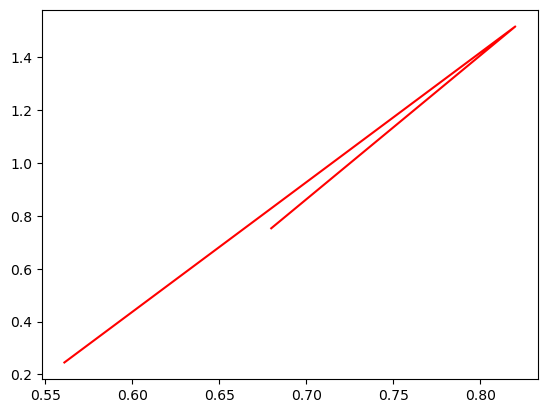

In [133]:
logito = np.log(tab['probabilidade']/(1-tab['probabilidade']))

plt.plot(tab['probabilidade'], logito, 'r');

In [54]:
import statsmodels.formula.api as smf

reglog = smf.logit("flag_doente ~ sex",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.650054
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                 0.05754
Time:                        15:45:13   Log-Likelihood:                -196.97
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 9.390e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0578      0.232     -4.557      0.000      -1.513      -0.603
sex            1.2722      0.271      4.692      0.000       0.741       1.804
==============================================================================
"""

2. Bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorização a variável em 5 grupos
- Cálculo do valor médio da variável ```age```

In [55]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [56]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

In [57]:
classes = [20, 30, 40, 50 ,60, 70]
labels = ['20a30','30a40','40a50','50a60','60a70']
classes = pd.cut(x=df.age, bins=classes, labels=labels)
df['Grupo_age'] = classes
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,Grupo_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,60a70
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,60a70
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,60a70
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,30a40
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,40a50


In [59]:
tab = pd.crosstab(df['Grupo_age'], df['flag_doente'], margins= True)
tab['probabilidade'] = tab[1]/tab['All']
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,probabilidade,chance
Grupo_age,,,,,
20a30,1,0,1,0.000000,0.000000
30a40,11,6,17,0.352941,0.545455
40a50,53,23,76,0.302632,0.433962
50a60,64,66,130,0.507692,1.031250
60a70,30,43,73,0.589041,1.433333
All,159,138,297,0.464646,0.867925


# Razão de Chances

In [60]:
RC_20a30 = tab.loc['20a30','chance']
RC_30a40 = tab.loc['30a40','chance']
RC_40a50 = tab.loc['40a50','chance']
RC_50a60 = tab.loc['50a60','chance']
RC_60a70 = tab.loc['60a70','chance']
print(RC_20a30,RC_30a40,RC_40a50,RC_50a60,RC_60a70)

0.0 0.5454545454545454 0.4339622641509434 1.03125 1.4333333333333333


In [61]:
tab['RC_vs_20a30'] = tab['chance']/tab.loc['20a30','chance']
tab['RC_vs_30a40'] = tab['chance']/tab.loc['30a40','chance']
tab['RC_vs_40a50'] = tab['chance']/tab.loc['40a50','chance']
tab['RC_vs_50a60'] = tab['chance']/tab.loc['50a60','chance']
tab['RC_vs_60a70'] = tab['chance']/tab.loc['60a70','chance']
tab

flag_doente,0,1,All,probabilidade,chance,RC_vs_20a30,RC_vs_30a40,RC_vs_40a50,RC_vs_50a60,RC_vs_60a70
Grupo_age,,,,,,,,,,
20a30,1,0,1,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
30a40,11,6,17,0.352941,0.545455,inf,1.000000,1.256917,0.528926,0.380550
40a50,53,23,76,0.302632,0.433962,inf,0.795597,1.000000,0.420812,0.302764
50a60,64,66,130,0.507692,1.031250,inf,1.890625,2.376359,1.000000,0.719477
60a70,30,43,73,0.589041,1.433333,inf,2.627778,3.302899,1.389899,1.000000
All,159,138,297,0.464646,0.867925,inf,1.591195,2.000000,0.841624,0.605529


C:\Users\RodrigoLacerda\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


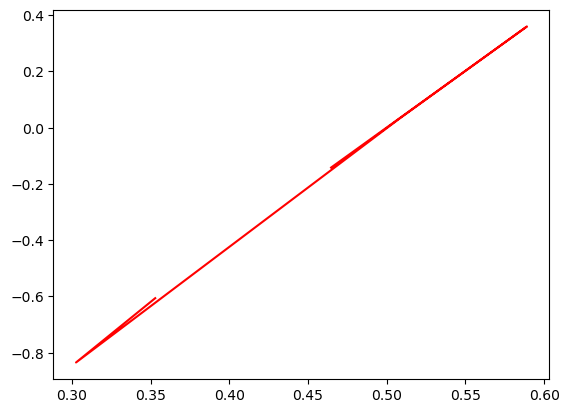

In [69]:
logito = np.log(tab['probabilidade']/(1-tab['probabilidade']))

plt.plot(tab['probabilidade'], logito, 'r');
plt.show()

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

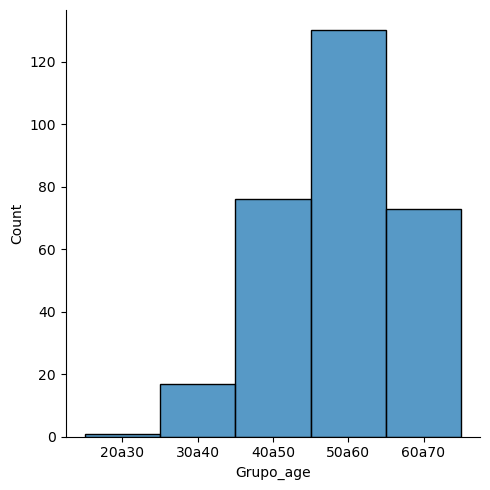

In [70]:
var = "Grupo_age"
sns.displot(df, x = var, bins = 50)
plt.show()

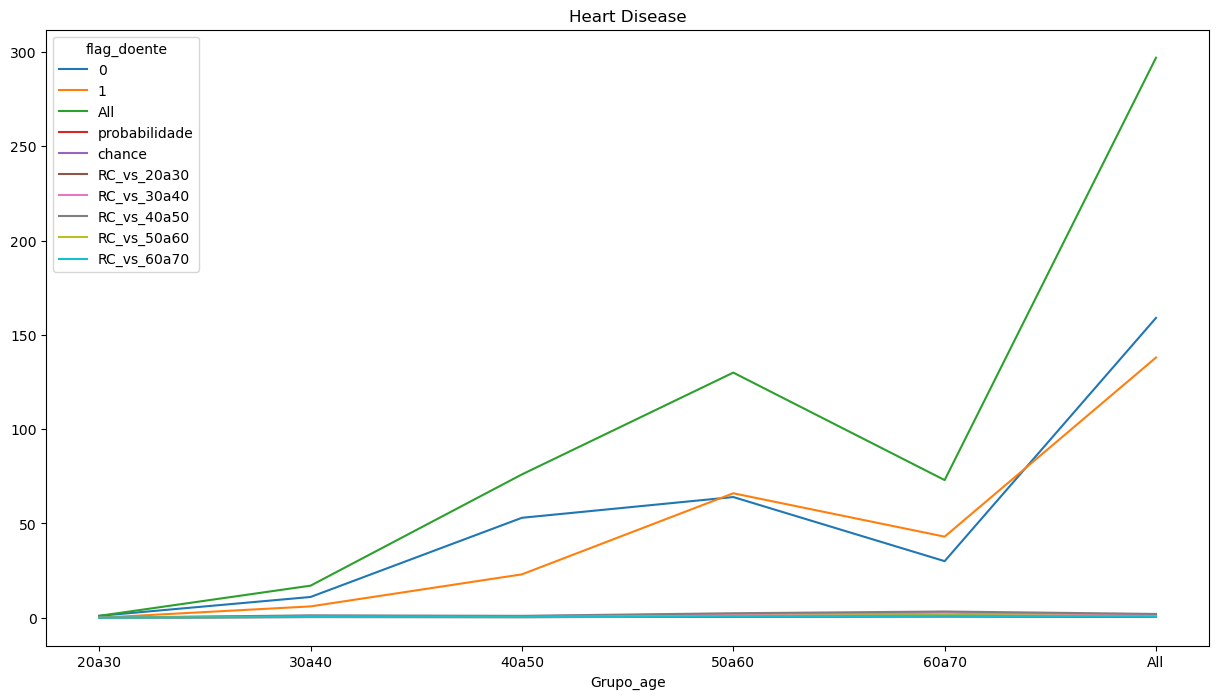

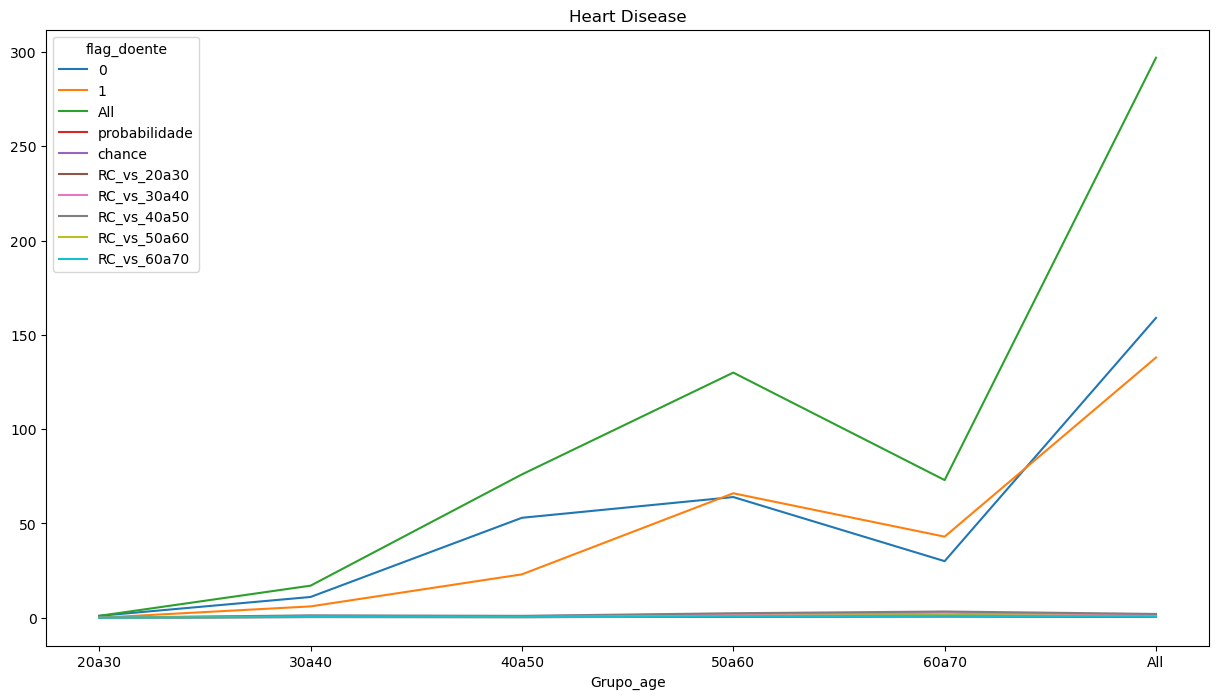

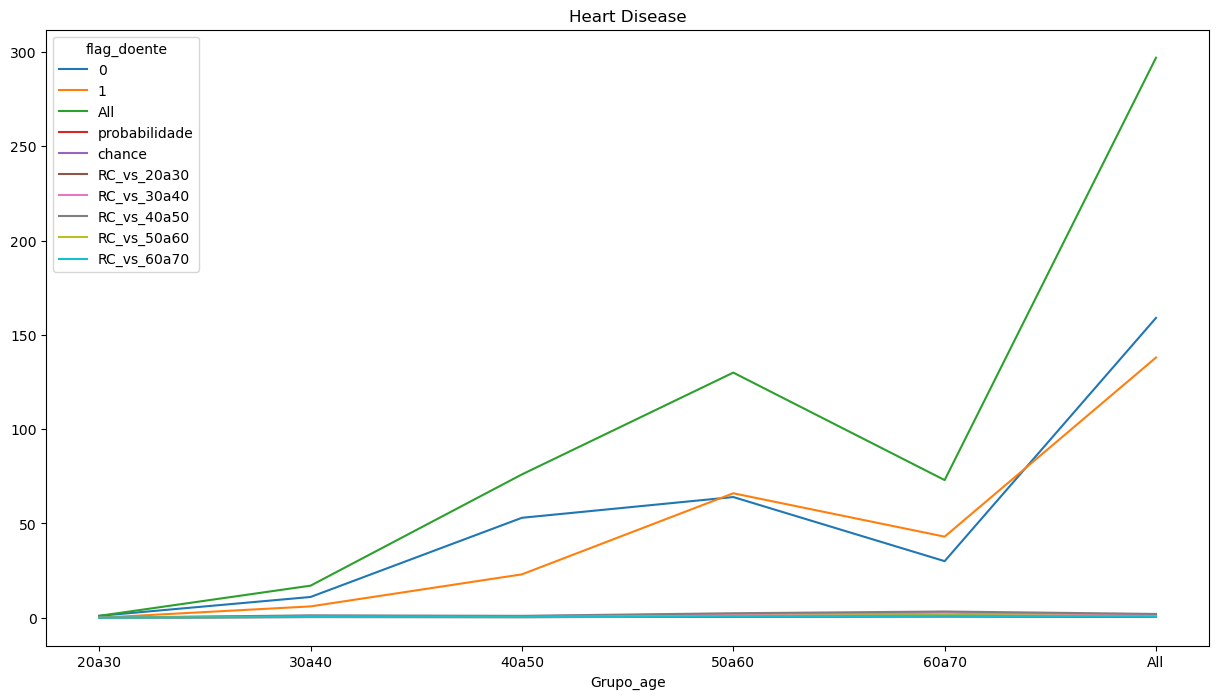

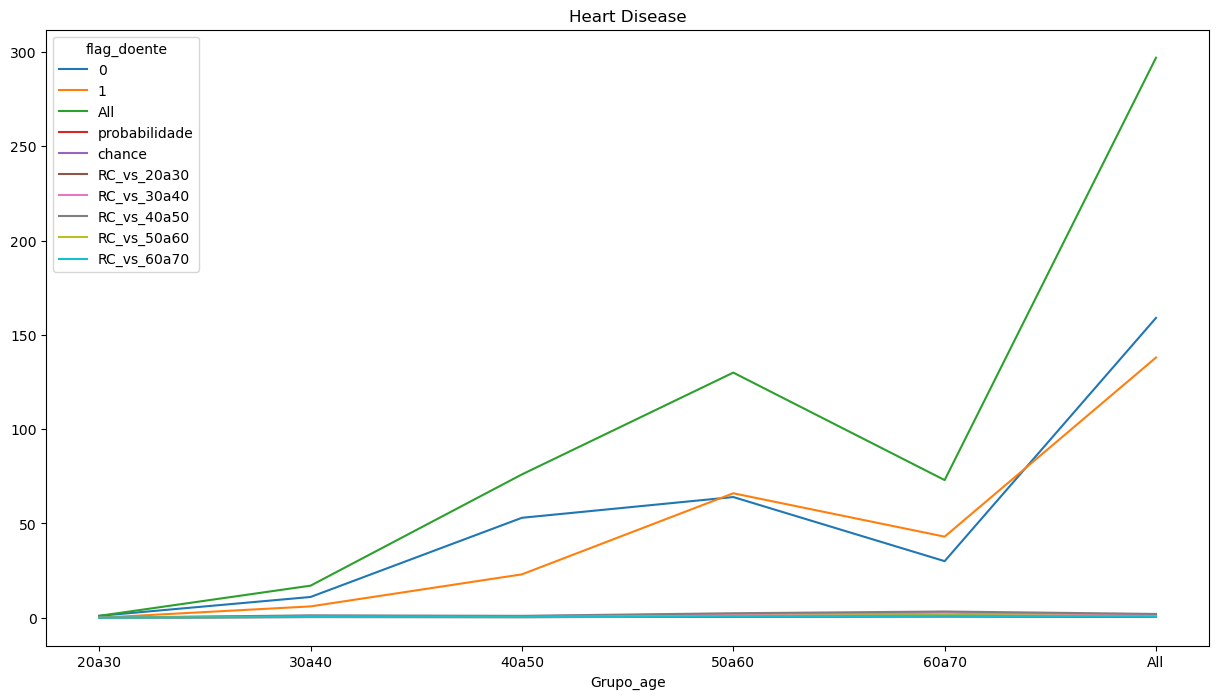

In [68]:
tab.plot
tab.plot(style='-', 
        figsize=(15,8), 
        title='Heart Disease')
plt.show()